In [3]:
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install seaborn as sns

You are using pip version 18.0, however version 20.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
player_stats = pd.read_csv("player_stats_data.csv", index_col=0)
player_stats.rename(columns={'PLAYER':'Player'}, inplace=True)
player_stats.head()

,Player,G,GLS,GPG,AST,APG,BLK,BPG,+ / -,+/- PG,CMP,CPG,CMP %,PP,PPG
0,Quentin Bonnaud,12,83,6.92,15,1.25,14,1.17,101,8.42,208,17.33,96.3,284,23.67
1,Rowan McDonnell,13,67,5.15,51,3.92,5,0.38,92,7.08,408,31.38,93.8,359,27.62
2,Ben Jagt,15,67,4.47,64,4.27,14,0.93,111,7.40,287,19.13,91.4,379,25.27
3,Max Sheppard,14,61,4.36,68,4.86,9,0.64,103,7.36,295,21.07,91.0,337,24.07
4,Eli Jaime,10,52,5.20,12,1.20,4,0.40,61,6.10,101,10.10,95.3,211,21.10


In [42]:
team_stats = pd.read_csv("team_stats.csv", index_col=0)
print(team_stats)

                       Team   G   W   L  T  PTS    PPG   PA   PAPG  OEFF  \
0           New York Empire  15  15   0  0  334  22.27  282  18.80  0.48   
1        San Diego Growlers  14  11   3  0  328  23.43  292  20.86  0.46   
2            Raleigh Flyers  13  10   3  0  293  22.54  255  19.62  0.39   
3         Dallas Roughnecks  15  10   5  0  320  21.33  300  20.00  0.32   
4   Pittsburgh Thunderbirds  14   9   5  0  298  21.29  270  19.29  0.33   
5    Indianapolis AlleyCats  14   9   5  0  280  20.00  270  19.29  0.36   
6      Los Angeles Aviators  13   9   4  0  306  23.54  267  20.54  0.39   
7              Toronto Rush  14   8   6  0  293  20.93  271  19.36  0.33   
8          Chicago Wildfire  13   7   6  0  271  20.85  257  19.77  0.31   
9                 DC Breeze  13   7   6  0  281  21.62  262  20.15  0.40   
10         Madison Radicals  12   6   6  0  250  20.83  222  18.50  0.31   
11     Minnesota Wind Chill  12   6   6  0  261  21.75  252  21.00  0.33   
12          

In [6]:
rosters = pd.read_csv("rosters.csv", index_col=0)
rosters.head()

,Player,Team
0,Sam Batson,hustle
1,Sun Choi,hustle
2,Karl Ekwurtzel,hustle
3,Brett Hulsmeyer,hustle
4,Elijah Jaime,hustle


In [7]:
data = rosters.merge(player_stats, left_on='Player', right_on='Player')
data.drop_duplicates(inplace=True)
data.head()

,Player,Team,G,GLS,GPG,AST,APG,BLK,BPG,+ / -,+/- PG,CMP,CPG,CMP %,PP,PPG
0,Sam Batson,hustle,8,0,0.00,4,0.50,3,0.38,4,0.50,24,3.00,88.9,67,8.38
1,Sun Choi,hustle,10,2,0.20,10,1.00,3,0.30,6,0.60,90,9.00,90.9,132,13.20
2,Karl Ekwurtzel,hustle,9,4,0.44,1,0.11,4,0.44,2,0.22,44,4.89,86.3,121,13.44
3,Brett Hulsmeyer,hustle,10,8,0.80,1,0.10,12,1.20,18,1.80,38,3.80,92.7,179,17.90
4,Matthew Knowles,hustle,7,0,0.00,13,1.86,0,0.00,7,1.00,117,16.71,95.1,108,15.43


In [8]:
from sklearn.linear_model import LinearRegression

Here, we are going to look at the correlations between assists and blocks, assists per game and blocks per game, goals and blocks, and goals per game and blocks per game. Although the merits of these expectations are not completely well-founded, many ultimate players believe that there exists a gap in physical ability between the two main positions in ultimate: handler and cutter. Handlers often stay close to the disc because they have exceptional throwing ability and less athleticism. They end up throwing many more goals (assists) than they catch. Cutters, on the other hand, use their superior athleticism to make bigger cuts across the field (similar to a wide receiver in football), catching many goals while throwing few assists. In ultimate, getting blocks is difficult. It is not uncommon for games to go on for many point without either defensive unit gaining possession of the disc. One of the key traits for getting a block is athleticism. Talented defenders can use their explosiveness or speed to surprise the offense and gain possession of the disc for their team with a well-timed dive or jump. Below, I aim to see if there is any support for the above notion in the data. If there is, we would expect a negative or weak positive correlation between assists and blocks, and a medium or string positive correlation between goals and blocks.

comparing APG and BPG, the correlation coefficient is:
0.09935165450558585


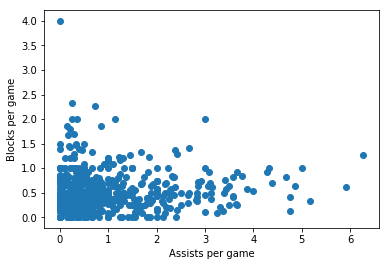

comparing total assists and blocks, the correlation coefficient is:
0.2781869452094744


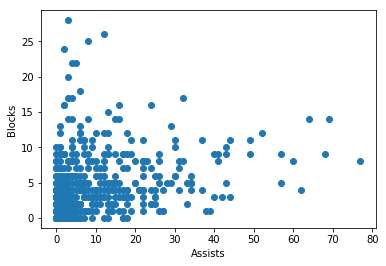

In [39]:
print('comparing APG and BPG, the correlation coefficient is:')
print(np.corrcoef(data['APG'], data['BPG'])[0][1])
plt.scatter(data['APG'], data['BPG'])
plt.xlabel('Assists per game')
plt.ylabel('Blocks per game')
plt.show()
print('comparing total assists and blocks, the correlation coefficient is:')
print(np.corrcoef(data['AST'], data['BLK'])[0][1])
plt.scatter(data['AST'], data['BLK'])
plt.xlabel('Assists')
plt.ylabel('Blocks')
plt.show()

In [10]:
ast_blk_model = LinearRegression()
ast_blk_model.fit(data[['AST']], data['BLK'])
print('assists and blocks.','slope:',ast_blk_model.coef_[0],'intercept:', ast_blk_model.intercept_)

assists and blocks. slope: 0.09873211752321828 intercept: 3.481292273008372


In [11]:
apg_bpg_model = LinearRegression()
apg_bpg_model.fit(data[['APG']], data['BPG'])
print('assists per game and blocks per game.','slope:',apg_bpg_model.coef_[0],'intercept:', apg_bpg_model.intercept_)

assists per game and blocks per game. slope: 0.039896996496095245 intercept: 0.45488145335483965


comparing goals per game and blocks per game, the correlation coefficient is:
0.17893315388829215


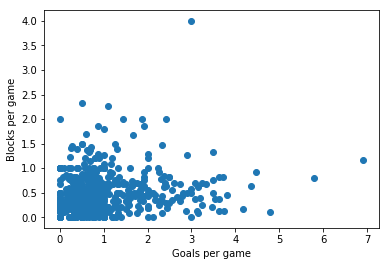

comparing goals and blocks, the correlation coefficient is:
0.3308606494558493


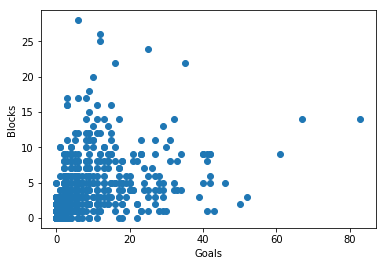

In [40]:
print('comparing goals per game and blocks per game, the correlation coefficient is:')
print(np.corrcoef(data['GPG'], data['BPG'])[0][1])
plt.scatter(data['GPG'], data['BPG'])
plt.xlabel('Goals per game')
plt.ylabel('Blocks per game')
plt.show()
print('comparing goals and blocks, the correlation coefficient is:')
print(np.corrcoef(data['GLS'], data['BLK'])[0][1])
plt.scatter(data['GLS'], data['BLK'])
plt.xlabel('Goals')
plt.ylabel('Blocks')
plt.show()

In [13]:
gpg_bpg_model = LinearRegression()
gpg_bpg_model.fit(data[['GPG']], data['BPG'])
print('goals per game and blocks per game.','slope:',gpg_bpg_model.coef_[0],'intercept:', gpg_bpg_model.intercept_)

goals per game and blocks per game. slope: 0.08029050819657213 intercept: 0.41676621266429814


In [14]:
gls_blk_model = LinearRegression()
gls_blk_model.fit(data[['GLS']], data['BLK'])
print('goals and blocks.','slope:',gls_blk_model.coef_[0],'intercept:', gls_blk_model.intercept_)

goals and blocks. slope: 0.13230847952242464 intercept: 3.192531558413319


There appears to be little evidence supporting our original hypothesis. This is probably due to the fact that in high-level professional ultimate, all plyers must have a significant level of athelticism. While one's hometown pickup games may feature plenty of beer-bellied 40-year-olds relieving their glory days as handlers with all the young souls running deep cut after deep cut, the AUDL is not the same.

Next, we decided to look at how well a team's top three players can predict the outcome of the entire team. We used +/- (plus-minus) to quantify the impact of players on their team. We then looked at the correlation between the cumulative +/- of the top three players on a team and their team's win total.

In [18]:
data.rename(columns={'+ / -':'plus_minus'}, inplace=True)
data.sort_values(by=['plus_minus'], inplace=True, ascending = False)
teams_names = {}
teams_pmt = {}
data.head()
for team_name in data.Team.unique():
    team_leaders_list = []
    plus_minus_total = 0
    temp_df = data.loc[data['Team'] == team_name]
    for x in range(0,3):
        entry = temp_df.iloc[x]
        team_leaders_list.append(entry['Player'])
        plus_minus_total += entry['plus_minus']
    teams_pmt[team_name] = plus_minus_total
    teams_names[team_name] = team_leaders_list
print(teams_names)
print(teams_pmt)


{'empire': ['Ben Jagt', 'Conor Kline', 'Jeff Babbitt'], 'thunderbirds': ['Max Sheppard', 'Thomas Edmonds', 'Jimmy Towle'], 'royal': ['Quentin Bonnaud', 'Kevin Quinlan', 'Sacha Poitte- Sokolsky'], 'growlers': ['Travis Dunn', 'Jonathan Helton', 'Sean Ham'], 'aviators': ['Sean McDougall', 'Joc Jimenez', 'Danny Landesman'], 'wildfire': ['Pawel Janas', 'Drew Swanson', 'Jack Shanahan'], 'roughnecks': ['Carson Wilder', 'Abe Coffin', 'Jay Froude'], 'flyers': ['Jacob Fairfax', 'Henry Fisher', 'Terrence Mitchell'], 'alleycats': ['Rick Gross', 'Keegan North', 'Levi Jacobs'], 'cascades': ['Jay Boychuk', 'Khalif El-Salaam', 'Zach Sabin'], 'rush': ['Cameron Harris', 'Nathan Hirst', 'Andrew Carroll'], 'windchill': ['Bryan Vohnoutka', 'Quinn Snider', 'Josh Klane'], 'outlaws': ['Alec Arsenault', 'Karl Loiseau', 'Jeremy Hill'], 'cannons': ['Bradley Seuntjens', 'Andrew Roney', 'Tanner Repasky'], 'hustle': ['Matt Smith', 'Christian Olsen', 'Will Lindquist'], 'spiders': ['Keenan Laurence', 'Lior Givol', 'M

In [19]:
# team_stats.assign(top_three_pm = np.zeros(len(team_stats.index)))
# team_stats.insert(3, "top_three_pm", np.zeros(len(team_stats.index)), True)
for team in team_stats['Team']:
    words = team.split()
    team_stats.replace(to_replace=team, value=words[-1].lower(), inplace=True)
team_stats.replace(to_replace='chill', value='windchill', inplace=True)
pm_list = []
for team in team_stats['Team']:
    pm_list.append(teams_pmt[team])
team_stats.insert(3, "top_three_pm", pm_list, True)

comparing Wins and the combined plus minus of each team's best three players
0.7999786670982612


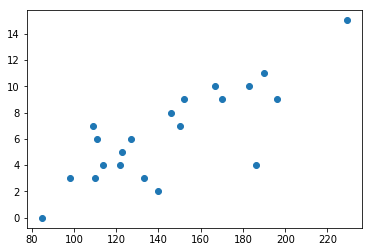

In [41]:
print('comparing Wins and the combined plus minus of each team\'s best three players')
print(np.corrcoef(team_stats['top_three_pm'], team_stats['W'])[0][1])
plt.scatter(team_stats['top_three_pm'], team_stats['W'])
plt.show()
# pm_w_model = LinearRegression()
# pm_w_model.fit(team_stats[['top_three_pm']], team_stats['W'])
# print('goals and blocks.','slope:',pm_w_model.coef_[0],'intercept:', pm_w_model.intercept_)

In [21]:
team_stats.sort_values(by=['top_three_pm'], inplace=True, ascending = False)
print(team_stats)

            Team   G   W  top_three_pm   L  T  PTS    PPG   PA   PAPG  ...    \
0         empire  15  15           229   0  0  334  22.27  282  18.80  ...     
4   thunderbirds  14   9           196   5  0  298  21.29  270  19.29  ...     
1       growlers  14  11           190   3  0  328  23.43  292  20.86  ...     
14         royal  12   4           186   8  0  238  19.83  253  21.08  ...     
3     roughnecks  15  10           183   5  0  320  21.33  300  20.00  ...     
6       aviators  13   9           170   4  0  306  23.54  267  20.54  ...     
2         flyers  13  10           167   3  0  293  22.54  255  19.62  ...     
5      alleycats  14   9           152   5  0  280  20.00  270  19.29  ...     
8       wildfire  13   7           150   6  0  271  20.85  257  19.77  ...     
7           rush  14   8           146   6  0  293  20.93  271  19.36  ...     
19      cascades  12   2           140  10  0  263  21.92  306  25.50  ...     
18       outlaws  12   3           133  

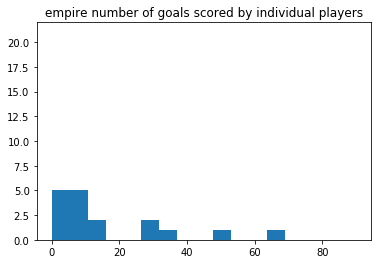

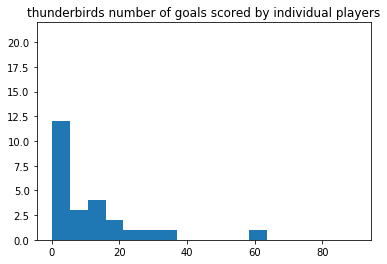

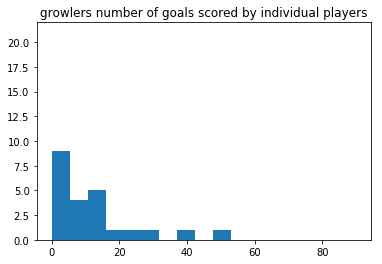

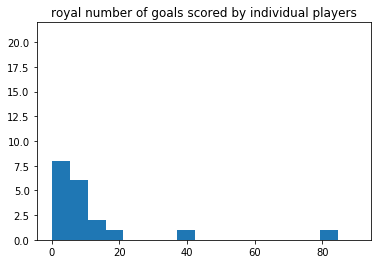

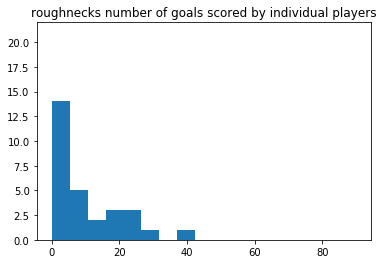

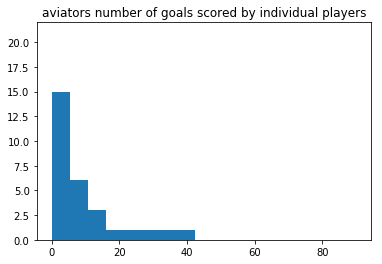

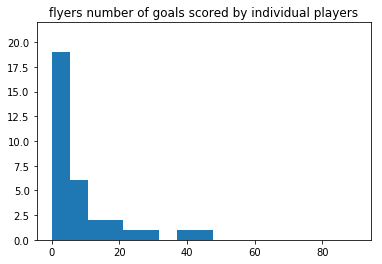

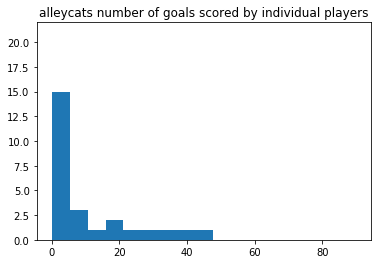

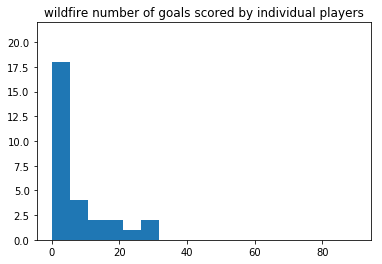

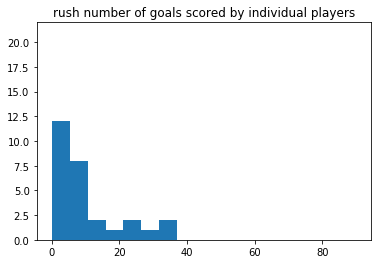

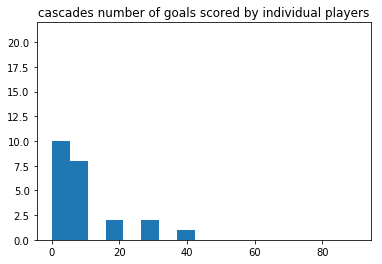

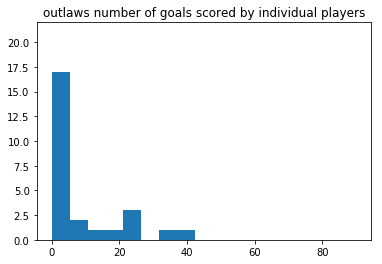

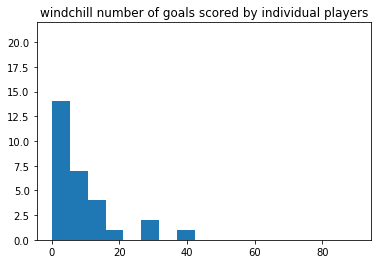

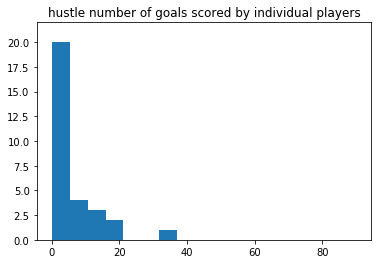

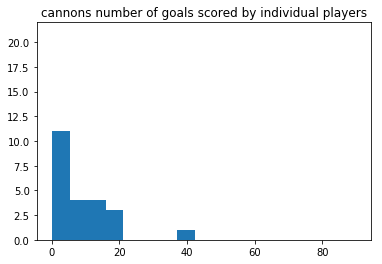

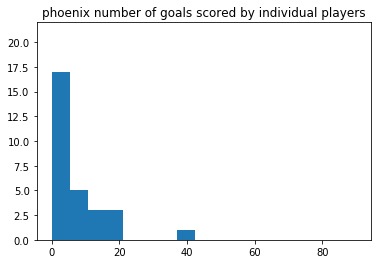

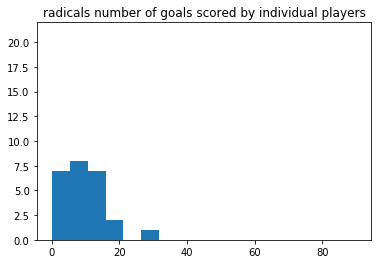

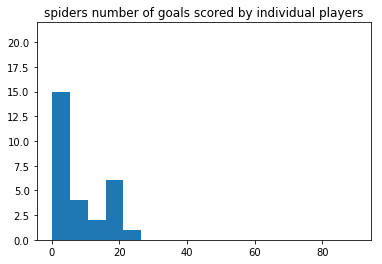

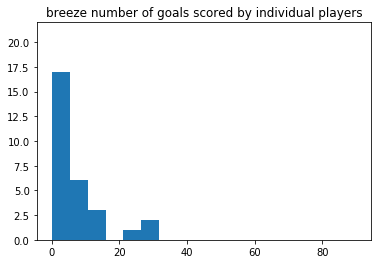

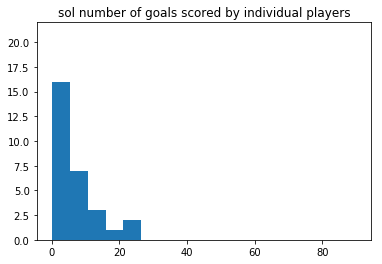

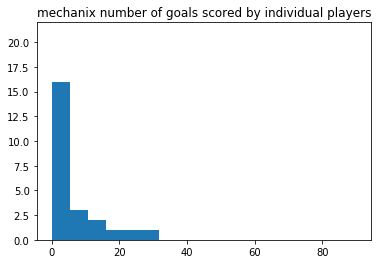

In [22]:
for team in team_stats['Team']:
    temp_df = data.loc[data['Team'] == team]
    plt.hist(temp_df['GLS'], bins = np.linspace(0,90, 18))
    plt.title(team + ' number of goals scored by individual players')
    plt.ylim(0,22)
#     plt.axes(bins=np.linspace(0, 90))
    plt.show()

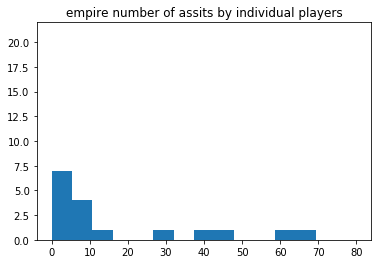

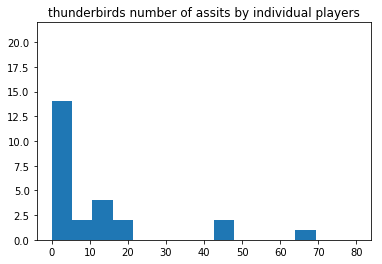

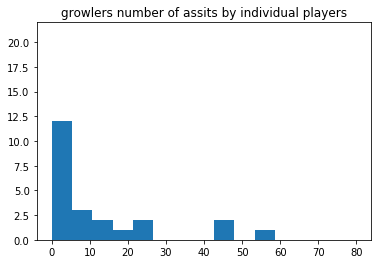

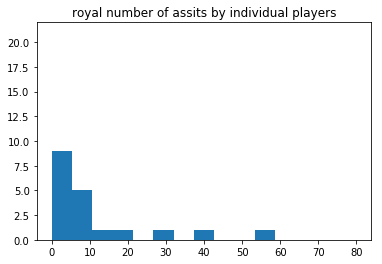

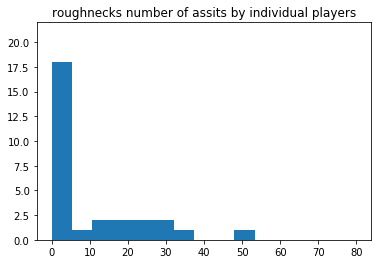

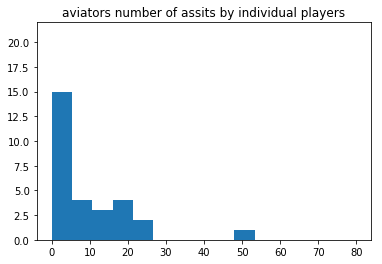

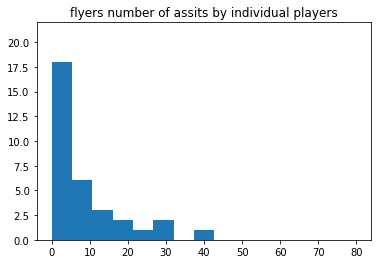

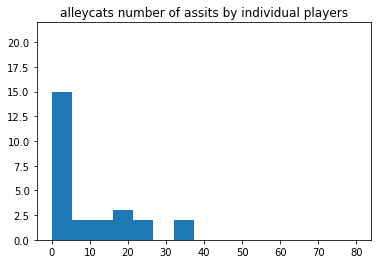

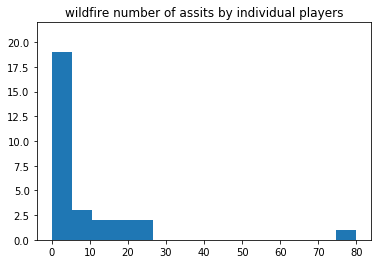

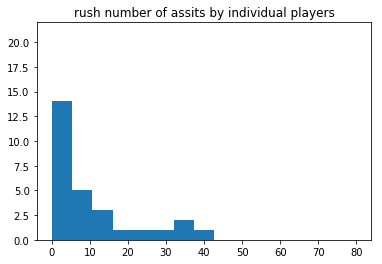

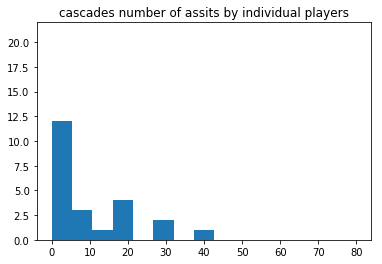

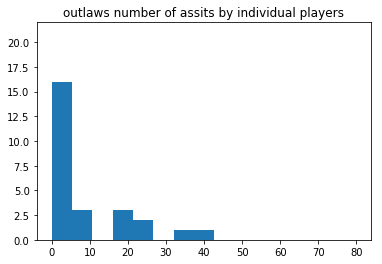

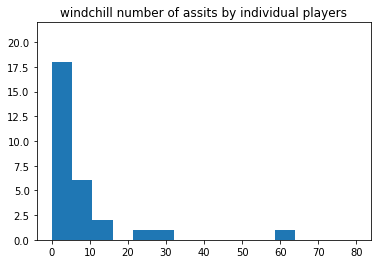

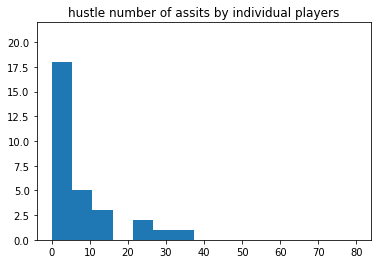

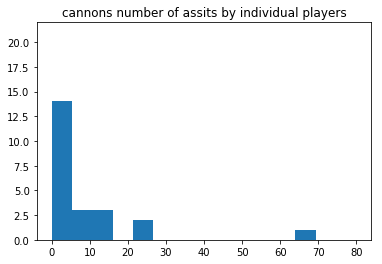

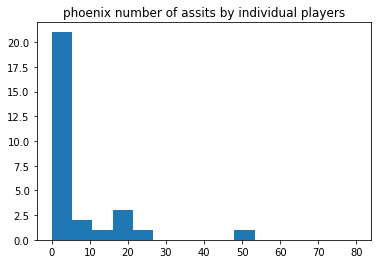

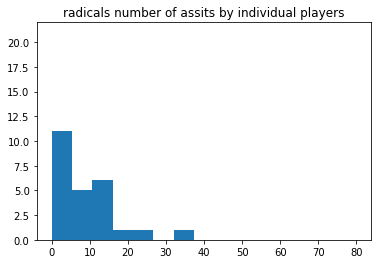

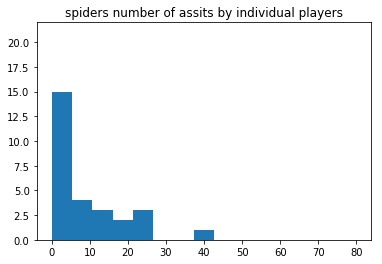

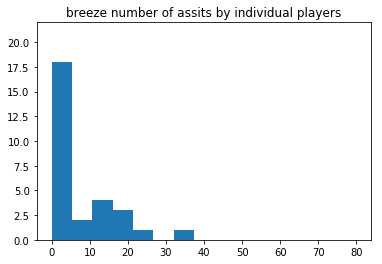

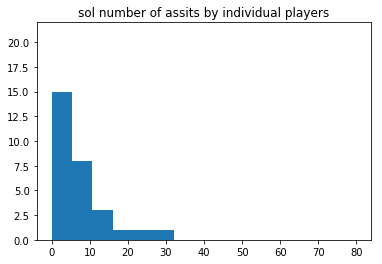

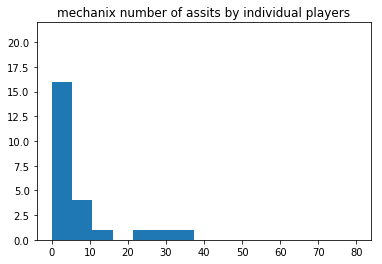

In [23]:
for team in team_stats['Team']:
    temp_df = data.loc[data['Team'] == team]
    plt.hist(temp_df['AST'], bins = np.linspace(0,80, 16))
    plt.title(team + ' number of assits by individual players')
    plt.ylim(0, 22)
#     plt.axes(bins=np.linspace(0, 90))
    plt.show()

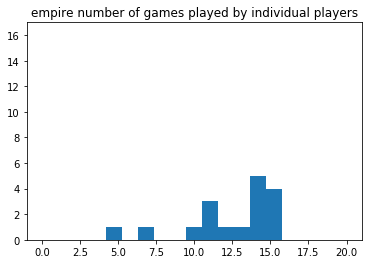

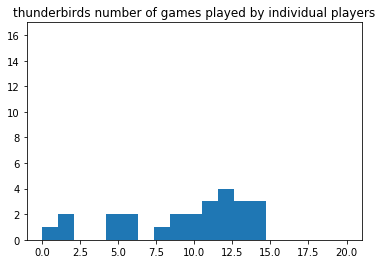

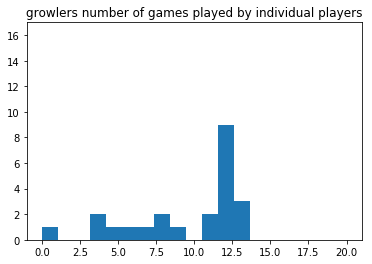

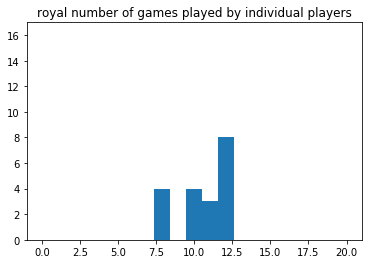

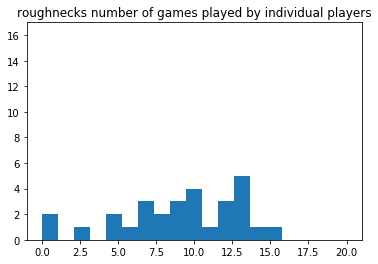

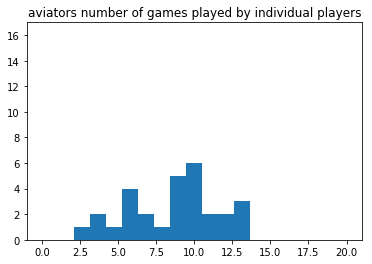

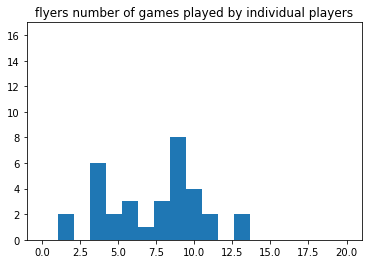

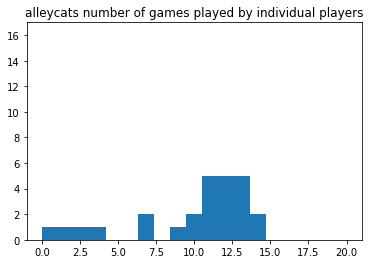

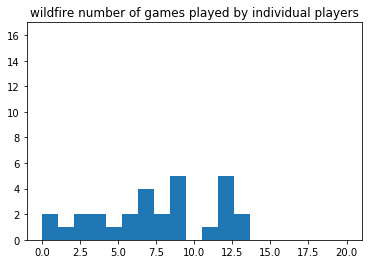

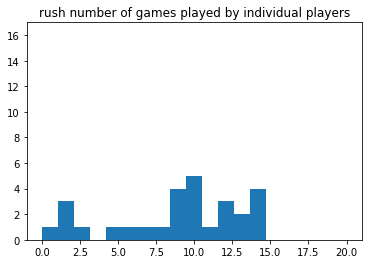

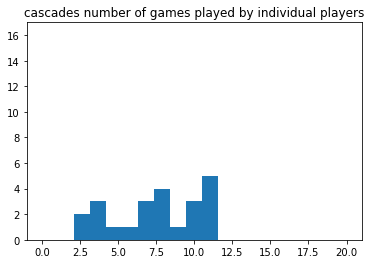

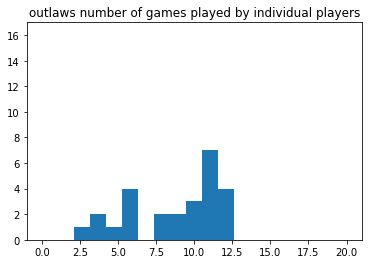

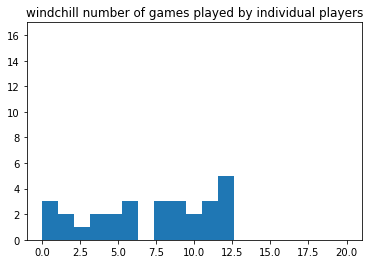

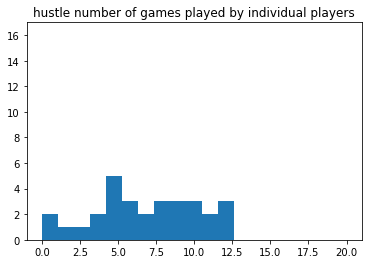

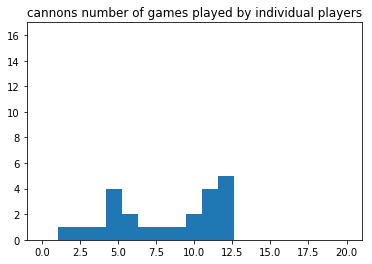

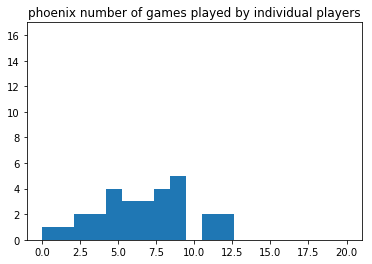

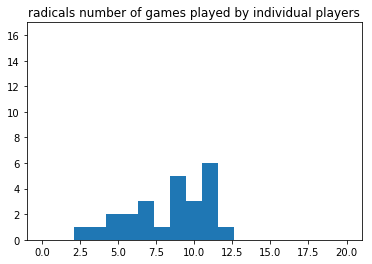

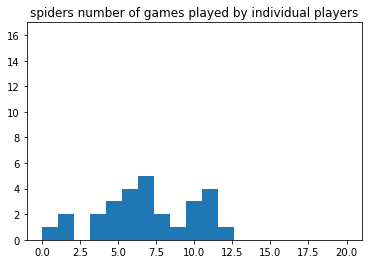

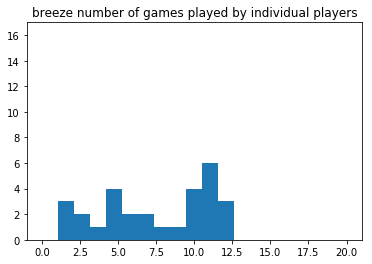

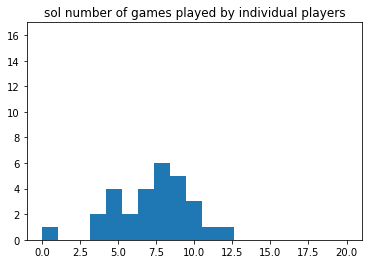

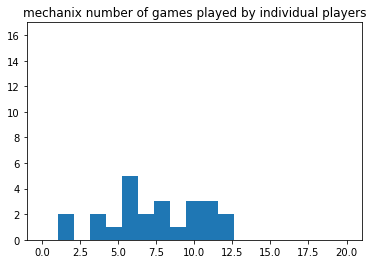

In [33]:
for team in team_stats['Team']:
    temp_df = data.loc[data['Team'] == team]
    plt.hist(temp_df['G'], bins = np.linspace(0,20, 20))
    plt.title(team + ' number of games played by individual players')
    plt.ylim(0, 17)
#     plt.axes(bins=np.linspace(0, 90))
    plt.show()